In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/Korisnik/py/manufacturing/data/raw/logs_all_machines.csv")

df.head()

,timestamp,machine_id,cycle_id,cycle_time,uptime,downtime,downtime_flag,maintenance_type,operator,shift,production_order_id,temperature,vibration,pressure
0,2025-01-01T06:00:00,1,1_0,71.146,71.146,0.0,0,NaN,Op1,1,PO-1892,59.141,0.01547,4.928
1,2025-01-01T06:01:11.145661,1,1_1,54.778,54.778,0.0,0,NaN,Op1,1,PO-9383,60.583,0.02205,4.500
2,2025-01-01T06:02:05.923924,1,1_2,65.992,65.992,0.0,0,NaN,Op2,1,PO-5260,61.315,0.01529,5.064
3,2025-01-01T06:03:11.915708,1,1_3,56.874,56.874,0.0,0,NaN,Op2,1,PO-5396,60.530,0.02424,5.205
4,2025-01-01T06:04:08.789711,1,1_4,58.714,58.714,0.0,0,NaN,Op1,1,PO-8037,59.689,0.01518,5.176


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            15000 non-null  object 
 1   machine_id           15000 non-null  int64  
 2   cycle_id             15000 non-null  object 
 3   cycle_time           15000 non-null  float64
 4   uptime               15000 non-null  float64
 5   downtime             15000 non-null  float64
 6   downtime_flag        15000 non-null  int64  
 7   maintenance_type     256 non-null    object 
 8   operator             15000 non-null  object 
 9   shift                15000 non-null  int64  
 10  production_order_id  15000 non-null  object 
 11  temperature          15000 non-null  float64
 12  vibration            15000 non-null  float64
 13  pressure             15000 non-null  float64
dtypes: float64(6), int64(3), object(5)
memory usage: 1.6+ MB


### Osnovna statistika (`describe()`)

Generisemo rezime numerickih vrijednosti kako bismo provjerili:
- tipicne/ekstremne vrijednosti
- odstupanja u ciklusnim vremenima
- raspon uptime vremena

In [3]:
df.describe()

,machine_id,cycle_time,uptime,downtime,downtime_flag,shift,temperature,vibration,pressure
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,2.000000,61.420405,60.244592,4.211002,0.038667,1.927467,62.423914,0.012485,4.511891
std,0.816524,7.170445,10.671062,35.882444,0.192806,0.813951,9.029747,0.014282,1.282348
min,1.000000,39.481000,0.000000,0.000000,0.000000,1.000000,45.750000,-0.036600,0.511000
25%,1.000000,56.249500,55.887000,0.000000,0.000000,1.000000,57.118000,0.007238,4.017500
50%,2.000000,60.841500,60.560500,0.000000,0.000000,2.000000,60.384000,0.016630,5.052500
75%,3.000000,66.146000,65.916750,0.000000,0.000000,3.000000,66.394500,0.022140,5.336000
max,3.000000,92.913000,92.913000,599.139000,1.000000,3.000000,88.692000,0.043460,6.639000


### Analiza udjela downtime dogadjaja

Ovo daje:
- ucestalost kvarova
- prvi pokazatelj efikasnosti masine

In [4]:
df['downtime_flag'].value_counts(normalize=True) * 100

downtime_flag
0    96.133333
1     3.866667
Name: proportion, dtype: float64

### Vizuelizacija redistribucije cycle_time vrijednosti

Histogram otkriva:
- da li je raspodjela približno normalna,
- da li postoje dvije populacije (npr. kvar vs normalan rad),
- da li ima ekstremnih outliera.

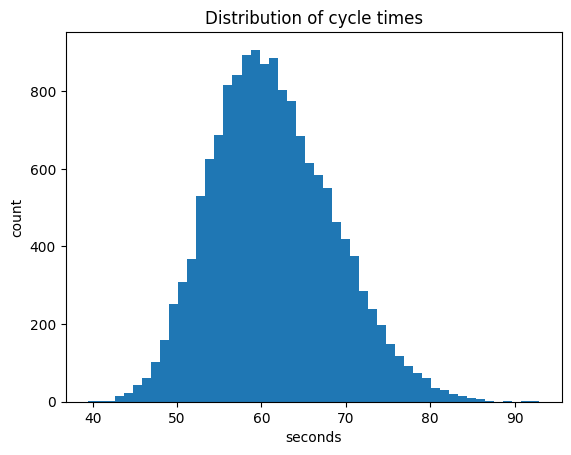

In [5]:
plt.hist(df['cycle_time'], bins=50)
plt.title("Distribution of cycle times")
plt.xlabel("seconds")
plt.ylabel("count")
plt.show()

### Učinak po smjenama

Grupišemo podatke po `shift` koloni i gledamo:
- prosječni `cycle_time`,
- stopu downtime-a.

Smjene često imaju različite performanse zbog operatora, održavanja i opterećenja.

   shift  avg_cycle_time  downtime_ratio
0      1       59.841037        0.038545
1      2       62.007069        0.041332
2      3       62.729706        0.035842


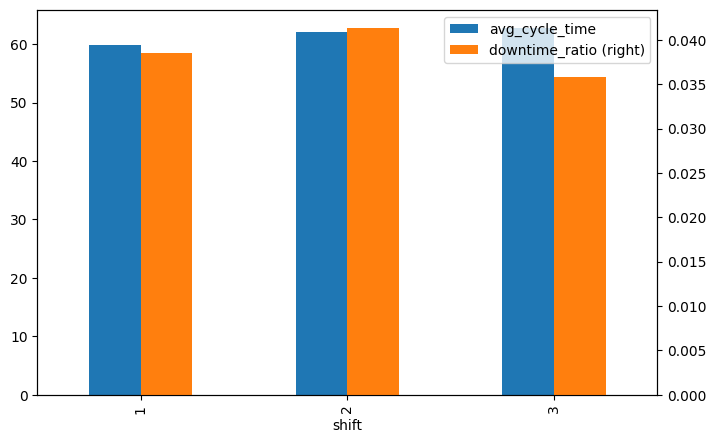

In [6]:
if 'shift' in df.columns:
    shift_stats = df.groupby('shift').agg(
        avg_cycle_time=('cycle_time', 'mean'),
        downtime_ratio=('downtime_flag', 'mean')  # srednja vrijednost = % downtime
    ).reset_index()
    
    print(shift_stats)
    
    # Vizualizacija
    shift_stats.plot(x='shift', y=['avg_cycle_time','downtime_ratio'], kind='bar', secondary_y='downtime_ratio', figsize=(8,5))

### Trend downtime-a u vremenu

Vremenski niz pokazuje:
- da li kvarovi rastu kako vrijeme prolazi,
- da li preventivni interval radi kako treba,
- ciklične efekte smjena i održavanja.

In [ ]:
# Trend: downtime po timestampu
# Plot ciklusnog vremena sa označenim downtime-om
import matplotlib.pyplot as plt

downtime_events = df[df['downtime_flag'] == 1]

plt.figure(figsize=(14,5))
plt.plot(df['timestamp'], df['cycle_time'], label='Cycle Time', linewidth=1)
plt.scatter(downtime_events['timestamp'], downtime_events['cycle_time'], color='red', label='Downtime', marker='x')
plt.title("Cycle Time Trend with Downtime Events")
plt.xlabel("Timestamp")
plt.ylabel("Cycle Time (sec)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Vizualizacija senzora kroz vrijeme

Trazim drift, anomalije, sum...

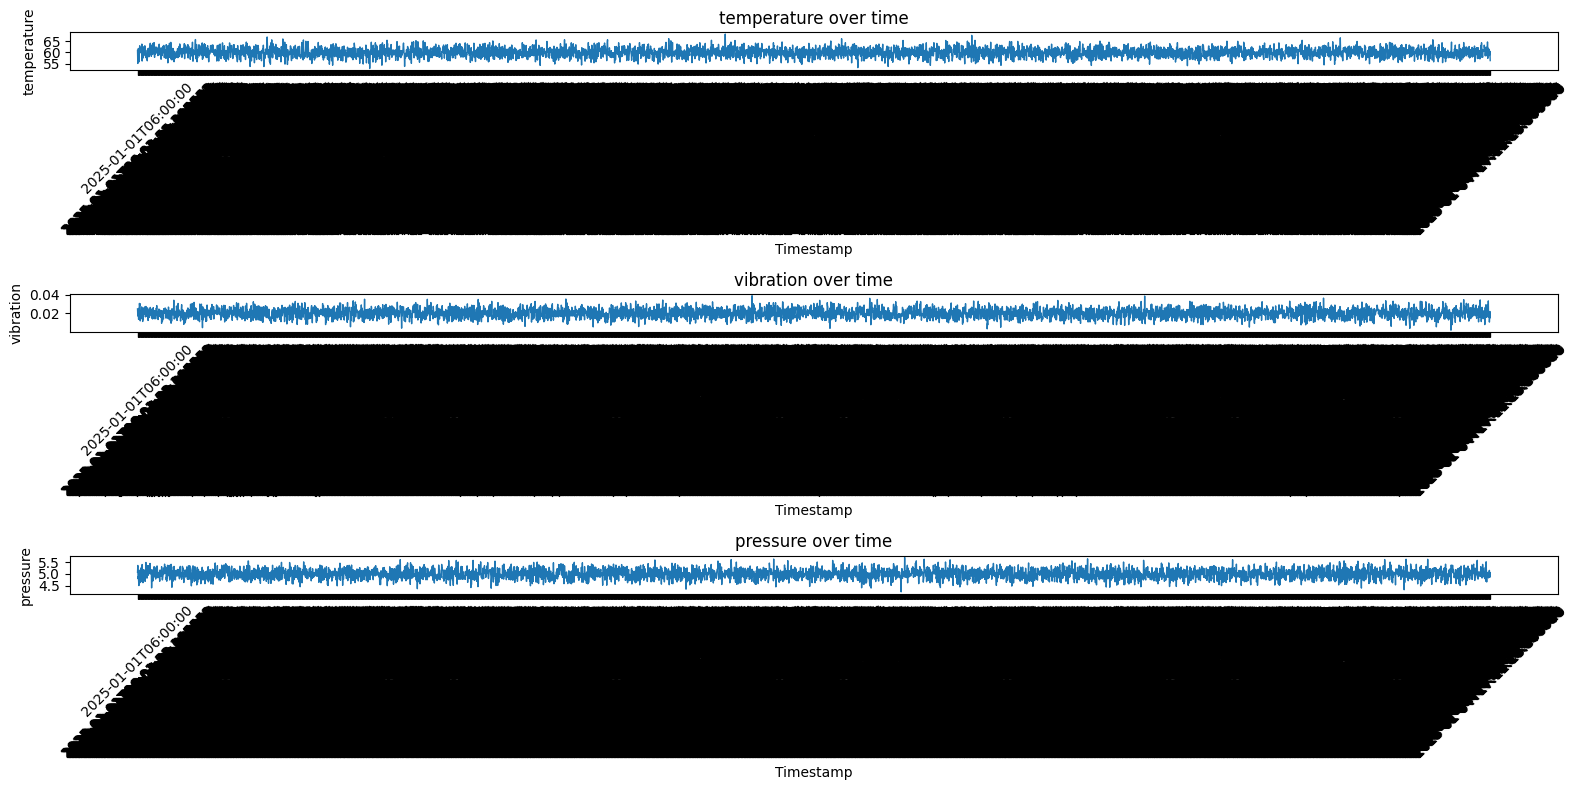

In [ ]:
sensors = ['temperature', 'vibration', 'pressure']

plt.figure(figsize=(16,8))
for i, sensor in enumerate(sensors, 1):
    plt.subplot(3,1,i)
    plt.plot(df['timestamp'], df[sensor], linewidth=1)
    plt.title(f"{sensor} over time")
    plt.xlabel("Timestamp")
    plt.ylabel(sensor)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Histogram senzora

Da li je distribucija normalna, koji su outlieri...

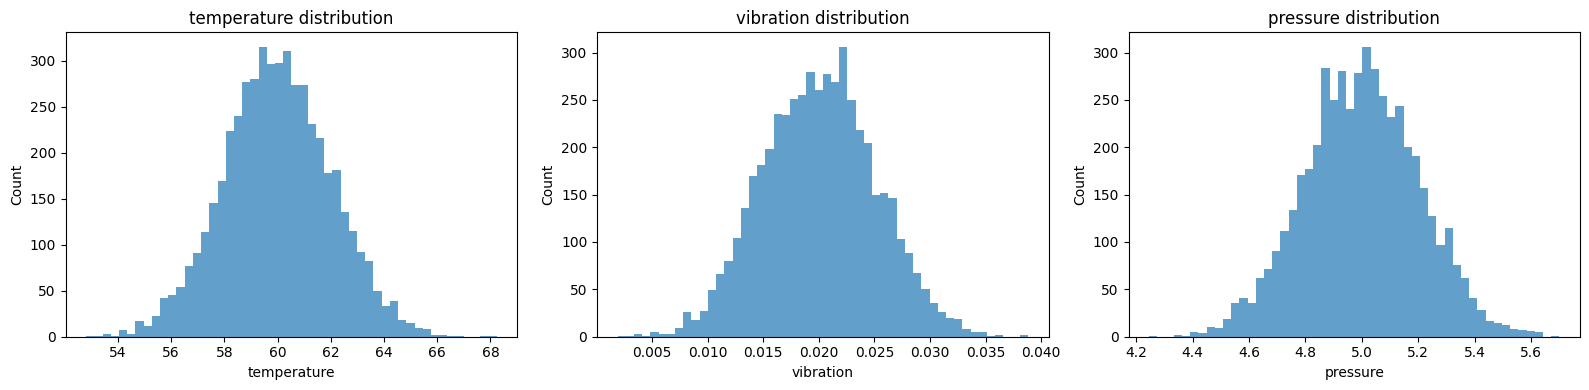

In [ ]:
plt.figure(figsize=(16,4))
for i, sensor in enumerate(sensors, 1):
    plt.subplot(1,3,i)
    plt.hist(df[sensor], bins=50, alpha=0.7)
    plt.title(f"{sensor} distribution")
    plt.xlabel(sensor)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Korelacija senzora sa downtime_flag

Na osnovu korelacije mozemo planirati feature selection za ML dio

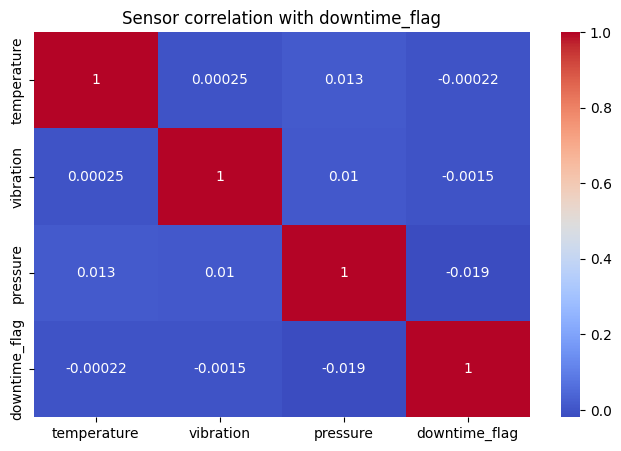

In [ ]:
import seaborn as sns

# Grupisanje po downtime_flag
df.groupby('downtime_flag')[sensors].mean()
df.groupby('downtime_flag')[sensors].std()

# Heatmap korelacije
plt.figure(figsize=(8,5))
sns.heatmap(df[sensors + ['downtime_flag']].corr(), annot=True, cmap="coolwarm")
plt.title("Sensor correlation with downtime_flag")
plt.show()

### Dodatne kolone za ML

- prosjecan ciklus posljednjih 5 ciklusa 
- broj downtimes u posljednjih 10 ciklusa
- promjena temperature

In [ ]:
import pandas as pd

df = pd.read_csv("C:/Users/Korisnik/py/manufacturing/data/raw/logs_all_machines.csv")

# Cycle time rolling stats
df['cycle_time_mean_5'] = df['cycle_time'].rolling(5, min_periods=1).mean()
df['cycle_time_max_5'] = df['cycle_time'].rolling(5, min_periods=1).max()
df['cycle_time_min_5'] = df['cycle_time'].rolling(5, min_periods=1).min()
df['cycle_time_std_5'] = df['cycle_time'].rolling(5, min_periods=1).std().fillna(0)

# Senzori signalizuju drift i anomalije
sensors = ['temperature','vibration','pressure']
for sensor in sensors:
    df[f'{sensor}_mean_5'] = df[sensor].rolling(5, min_periods=1).mean()
    df[f'{sensor}_std_5'] = df[sensor].rolling(5, min_periods=1).std().fillna(0)
    df[f'{sensor}_trend_5'] = df[sensor].diff().rolling(5, min_periods=1).mean()

# Downtime rolling stats - trenutni rizik u prethodnim ciklusima
df['downtime_count_10'] = df['downtime_flag'].rolling(10, min_periods=1).sum()
df['downtime_sum_20'] = df['downtime'].rolling(20, min_periods=1).sum()
df['downtime_pct_20'] = df['downtime_flag'].rolling(20, min_periods=1).mean()

# Lag features
df['cycle_time_lag_1'] = df['cycle_time'].shift(1)
df['temp_lag_1'] = df['temperature'].shift(1)
df['vib_lag_1'] = df['vibration'].shift(1)
df['press_lag_1'] = df['pressure'].shift(1)

# -----------------------------
# Categorical encoding
# -----------------------------

# Operator: label encode
df['operator'] = df['operator'].astype('category')

# Maintenance type: fill NaN -> 'none', then encode
df['maintenance_type'] = df['maintenance_type'].fillna('none').astype('category')
df['maintenance_type_encoded'] = df['maintenance_type'].astype('category').cat.codes

# Shift can remain numeric; machine_id is 1, no encoding needed

# -----------------------------
# Save ML-ready dataset
# -----------------------------
df.to_csv("C:/Users/Korisnik/py/manufacturing/data/processed/logs_all_machines_features.csv", index=False)
print("Saved ML-ready dataset with rolling, lag and encoded features!")

Saved ML-ready dataset with rolling, lag and encoded features!
